In [0]:
!pip install pydap
!pip install netcdf4

!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev
!pip install Cython
!pip install --upgrade --force-reinstall shapely --no-binary shapely
!pip install cartopy

%pylab inline
import pandas as pd
import xarray as xr

  Using cached https://files.pythonhosted.org/packages/44/ec/4eddbf9d17a917c51fb4ad159aa7137f506681e91ab559cf87d120e1d78d/Shapely-1.7.0.tar.gz
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.0
    Uninstalling Shapely-1.7.0:
      Successfully uninstalled Shapely-1.7.0
    Running setup.py install for shapely ... done
Populating the interactive namespace from numpy and matplotlib


# **Extreme Precipitation Days (1996-2019)**

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
!pip install gdown
!gdown https://drive.google.com/drive/u/1/folders/1sb5kMCae3W_yfc8Ul3xaSHYjigbIk2OC

/usr/local/lib/python2.7/dist-packages/gdown/parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=None
  .format(url='https://drive.google.com/uc?id={}'.format(file_id))
Downloading...
From: https://drive.google.com/drive/u/1/folders/1sb5kMCae3W_yfc8Ul3xaSHYjigbIk2OC
To: /content/1sb5kMCae3W_yfc8Ul3xaSHYjigbIk2OC
65.3kB [00:00, 8.76MB/s]


In [0]:
precip_data = pd.read_csv("/content/drive/My Drive/Xtreme_Precip_days_Hilo.csv")

FileNotFoundError: ignored

In [0]:
# precip_data = precip_data.drop(['Time'], axis=1)
precip_data


time  latitude  longitude     precip
0    1996-10-16      20.0      205.0  15.163979
1    1996-11-13      20.0      205.0  38.501457
2    1996-11-14      20.0      205.0  38.944233
3    1996-11-22      20.0      205.0  16.506926
4    1997-11-03      20.0      205.0   9.424886
..          ...       ...        ...        ...
104  2018-10-19      20.0      205.0  11.067375
105  2018-10-20      20.0      205.0  16.663464
106  2018-12-30      20.0      205.0  15.177353
107  2019-10-10      20.0      205.0  10.696703
108  2019-10-26      20.0      205.0  13.532143

[109 rows x 4 columns]

In [0]:
# time = pd.to_datetime(precip_data['time'], format='%Y%m%d', errors='ignore')
# time

0      1996-10-16
1      1996-11-13
2      1996-11-14
3      1996-11-22
4      1997-11-03
          ...    
104    2018-10-19
105    2018-10-20
106    2018-12-30
107    2019-10-10
108    2019-10-26
Name: time, Length: 109, dtype: object

In [0]:
# precip_data
# year = pd.DatetimeIndex(precip_data['time']).year
# year

Int64Index([1996, 1996, 1996, 1996, 1997, 1997, 1997, 1998, 1998, 1998,
            ...
            2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2019, 2019],
           dtype='int64', name='time', length=109)

In [0]:
pd.to_datetime(np.array(precip_data['time'][pd.DatetimeIndex(precip_data['time']).year.values == iyr]))

DatetimeIndex(['1996-10-16', '1996-11-13', '1996-11-14', '1996-11-22'], dtype='datetime64[ns]', freq=None)

In [0]:
np.array(precip_data['time'][pd.DatetimeIndex(precip_data['time']).year.values == 2006])

array(['2006-10-01', '2006-10-06', '2006-10-17', '2006-10-20',
       '2006-11-02', '2006-11-03', '2006-12-02'], dtype=object)

In [0]:
len(precip_data['time'][pd.DatetimeIndex(precip_data['time']).year.values == 2005])

0

In [0]:
# **NCEP reanalysis data on Extreme Precipitation Days (1996-2019)**

In [0]:
years = pd.date_range(start='1996-01-01', end='2019-12-31', freq='D')
yearmon = years[(years.month==10) | (years.month==11) | (years.month==12)]



In [0]:
windv_250_ds = []
windu_250_ds = []
windv_500_ds = []
windu_500_ds = []
hgt_500_ds = []
windv_850_ds = []
windu_850_ds = []
temp_850_ds = []
shum_850_ds = []
sktemp_ds = []
surf_windu_ds = []
surf_windv_ds = []
pr_wtr_ds = []

years = [i for i in range(1996,2020)]


for iyr in years:
    print('working on '+str(iyr))
    if len(precip_data['time'][pd.DatetimeIndex(precip_data['time']).year.values == iyr])>0:
      dates_year = pd.to_datetime(np.array(precip_data['time'][pd.DatetimeIndex(precip_data['time']).year.values == iyr]))
      #find 3 random dates in 1996 during June - August - here you would put your extreme precip dates for this year
      #dates = random_dates2(pd.datetime(iyr,6,1), pd.datetime(iyr,8,31), 3)
      #let's access geopotential height at 500 hPa
      windu_250 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=250,time=dates_year)
      windu_250_ds.append(windu_250)

      windv_250 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=250,time=dates_year)
      windv_250_ds.append(windv_250)

      windu_500 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=500,time=dates_year)
      windu_500_ds.append(windu_500)

      windv_500 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=500,time=dates_year)
      windv_500_ds.append(windv_500)

      hgt_500 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/hgt.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=500,time=dates_year)
      hgt_500_ds.append(hgt_500)

      temp_850 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/air.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=850,time=dates_year)
      temp_850_ds.append(temp_850)

      shum_850 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/shum.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=850,time=dates_year)
      shum_850_ds.append(shum_850)

      windu_850 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=850,time=dates_year)
      windu_850_ds.append(windu_850)

      windv_850 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=850,time=dates_year)
      windv_850_ds.append(windv_850)

      sktemp = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/skt.sfc.gauss.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(time=dates_year)
      sktemp_ds.append(sktemp)

      surf_windu = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/uwnd.sig995.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(time=dates_year)
      surf_windu_ds.append(surf_windu)

      surf_windv = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/vwnd.sig995.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(time=dates_year)
      surf_windv_ds.append(surf_windv)

      pr_wtr = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/pr_wtr.eatm.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(time=dates_year)
      pr_wtr_ds.append(pr_wtr)

working on 1996
working on 1997
working on 1998
working on 1999
working on 2000
working on 2001
working on 2002
working on 2003
working on 2004
working on 2005
working on 2006
working on 2007
working on 2008
working on 2009
working on 2010
working on 2011
working on 2012
working on 2013
working on 2014
working on 2015
working on 2016
working on 2017
working on 2018
working on 2019


In [0]:
windv_850_ds

[<xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144, time: 4)
 Coordinates:
     level    float32 850.0
   * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
   * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
   * time     (time) datetime64[ns] 1996-10-16 1996-11-13 1996-11-14 1996-11-22
 Data variables:
     vwnd     (time, lat, lon) float32 ...
 Attributes:
     References:                      http://www.esrl.noaa.gov/psd/data/gridde...
     dataset_title:                   NCEP-NCAR Reanalysis 1
     Conventions:                     COARDS
     title:                           mean daily NMC reanalysis (1996)
     description:                     Data is from NMC initialized reanalysis\...
     platform:                        Model
     history:                         created 95/02/06 by Hoop (netCDF2.3)\nCo...
     DODS_EXTRA.Unlimited_Dimension:  time, <xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144, time: 3)
 Coordinates:
 

In [0]:
windu_250_ds_yearcombined = xr.concat(windu_250_ds, dim='time')
windu_250_ds_yearcombined

windv_250_ds_yearcombined = xr.concat(windv_250_ds, dim='time')
windv_250_ds_yearcombined

hgt_500_ds_yearcombined = xr.concat(hgt_500_ds, dim='time')
hgt_500_ds_yearcombined

windu_500_ds_yearcombined = xr.concat(windu_500_ds, dim='time')
windu_500_ds_yearcombined

windv_500_ds_yearcombined = xr.concat(windv_500_ds, dim='time')
windv_500_ds_yearcombined

windu_850_ds_yearcombined = xr.concat(windu_850_ds, dim='time')
windu_850_ds_yearcombined

windv_850_ds_yearcombined = xr.concat(windv_850_ds, dim='time')
windv_850_ds_yearcombined

temp_850_ds_yearcombined = xr.concat(temp_850_ds, dim='time')
temp_850_ds_yearcombined

shum_850_ds_yearcombined = xr.concat(shum_850_ds, dim='time')
shum_850_ds_yearcombined

sktemp_ds_yearcombined = xr.concat(sktemp_ds, dim='time')
sktemp_ds_yearcombined

surf_windu_ds_yearcombined = xr.concat(surf_windu_ds, dim='time')
surf_windu_ds_yearcombined

surf_windv_ds_yearcombined = xr.concat(surf_windv_ds, dim='time')
surf_windv_ds_yearcombined

pr_wtr_ds_yearcombined = xr.concat(pr_wtr_ds, dim='time')
pr_wtr_ds_yearcombined

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 109)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1996-10-16 1996-11-13 ... 2019-10-26
Data variables:
    pr_wtr   (time, lat, lon) float32 3.0499878 3.0499878 ... 0.05 0.05
Attributes:
    Conventions:                     COARDS
    title:                           mean daily NMC reanalysis (1996)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    history:                         created 96/03/28 by Hoop (netCDF2.3.2)\n...
    References:                      http://www.esrl.noaa.gov/psd/data/gridde...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    DODS_EXTRA.Unlimited_Dimension:  time

In [0]:
pr_wtr_ds_yearcombined.to_netcdf('pr_wtr_ds_yearcombined_extrem.nc')
surf_windv_ds_yearcombined.to_netcdf('surf_windv_ds_yearcombined_extrem.nc')
surf_windu_ds_yearcombined.to_netcdf('surf_windu_ds_yearcombined_extrem.nc')
sktemp_ds_yearcombined.to_netcdf('sktemp_ds_yearcombined_extrem.nc')
shum_850_ds_yearcombined.to_netcdf('shum_850_ds_yearcombined_extrem.nc')
temp_850_ds_yearcombined.to_netcdf('temp_850_ds_yearcombined_extrem.nc') 
windv_850_ds_yearcombined.to_netcdf('windv_850_ds_yearcombined_extrem.nc')
windu_850_ds_yearcombined.to_netcdf('windu_850_ds_yearcombined_extrem.nc')
windv_500_ds_yearcombined.to_netcdf('windv_500_ds_yearcombined_extrem.nc')
windu_500_ds_yearcombined.to_netcdf('windu_500_ds_yearcombined_extrem.nc')
hgt_500_ds_yearcombined.to_netcdf('hgt_500_ds_yearcombined_extrem.nc')
windv_250_ds_yearcombined.to_netcdf('windv_250_ds_yearcombined_extrem.nc')
windu_250_ds_yearcombined.to_netcdf('windu_250_ds_yearcombined_extrem.nc')

!mv *.nc "/content/drive/My Drive/"

In [0]:
pr_wtr = xr.open_dataset('/content/drive/My Drive/pr_wtr_ds_yearcombined_extrem.nc', engine='netcdf4')
avg = pr_wtr['pr_wtr'].mean(dim='time')

# import matplotlib.pyplot as plt

# plt.pcolormesh(avg)
# plt.show()

In [0]:
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature

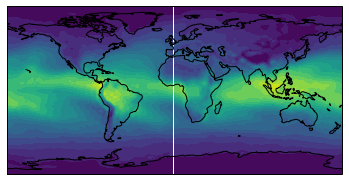

In [0]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('110m'))
plt.contourf(avg['lon'], avg['lat'], avg.values.squeeze(), 20, transform=ccrs.PlateCarree())

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    pr_wtr   (lat, lon) float32 2.3486238 2.3486238 2.3486238 ... 0.0 0.0 0.0

# **Baseline for Comparison (1981-2010)**

In [0]:
months = xr.cftime_range(start='0001-01-01', end='0001-12-01', freq='MS', calendar = 'standard') # selecting long-term mean data for 1981-2010 with cftime.DatetimeGregorian format

months = months[(months.month==10)|(months.month==11)|(months.month==12)] # selecting long-term mean data for OND in 1981-2010


In [15]:
# 250 hPa wind vectors and wind speed 

windu_250_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=250, time=months)

windv_250_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=250, time=months)

windspd_250_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/wspd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=250, time=months)

# 500 hPa wind vectors and geopotential height 

windu_500_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=500, time=months)

windv_500_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=500, time=months)

hgt_500_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=500, time=months)

# 850 hPa temperature, specific humidity, and wind vectors 

temp_850_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/air.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=850, time=months)

spec_hum_850_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/shum.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=850, time=months)

windu_850_ltm_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=850, time=months)

windv_850_ltm_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=850, time=months)

# skin temperature 

skin_temp_ltm_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/skt.sfc.mon.1981-2010.ltm.nc', engine='netcdf4').sel(time=months)

# surface winds (sig995??)

surf_wind_u_baseline = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/uwnd.sig995.mon.1981-2010.ltm.nc', engine='netcdf4').sel(time=months)

surf_wind_v_baseline = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/vwnd.sig995.mon.1981-2010.ltm.nc', engine='netcdf4').sel(time=months)

# total atmospheric column water vapor 

atm_col_wv_baseline = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/pr_wtr.eatm.day.1981-2010.ltm.nc', engine='netcdf4').sel(time=months)

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time ax

In [0]:
# Calculating Seasonal Means 
windu_250_ltm_OND = windu_250_baseline.mean(dim='time')
windv_250_ltm_OND = windv_250_baseline.mean(dim='time')
windspd_250_ltm_OND = windspd_250_baseline.mean(dim='time')

windu_500_ltm_OND = windu_500_baseline.mean(dim='time')
windv_500_ltm_OND = windv_500_baseline.mean(dim='time')
hgt_500_ltm_OND = hgt_500_baseline.mean(dim='time')

temp_850_ltm_OND = temp_850_baseline.mean(dim='time')
spec_hum_850_ltm_OND = spec_hum_850_baseline.mean(dim='time')
windu_850_ltm_OND = windu_850_ltm_baseline.mean(dim='time')
windv_850_ltm_OND = windv_850_ltm_baseline.mean(dim='time')

skin_temp_ltm_OND = skin_temp_ltm_baseline.mean(dim='time')
surf_wind_u_ltm_OND = surf_wind_u_baseline.mean(dim='time')
surf_wind_v_ltm_OND = surf_wind_v_baseline.mean(dim='time')
atm_col_wv_ltm_OND = atm_col_wv_baseline.mean(dim='time')

# **Calculating Seasonal Anomalies**


In [0]:
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature
import matplotlib.ticker as mticker


from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

250 hPa

In [0]:
windu_250_ds_yearcombined_extrem = xr.open_dataset('/content/drive/My Drive/ATMS_597_Project_3_Group_D/fields on extreme precip days/windu_250_ds_yearcombined_extrem.nc', engine='netcdf4')
windv_250_ds_yearcombined_extrem = xr.open_dataset('/content/drive/My Drive/ATMS_597_Project_3_Group_D/fields on extreme precip days/windv_250_ds_yearcombined_extrem.nc', engine='netcdf4')

In [0]:
sa_windu_250_ds_yearcombined_extrem = windu_250_ds_yearcombined_extrem.mean(dim='time') - windu_250_ltm_OND
sa_windv_250_ds_yearcombined_extrem = windv_250_ds_yearcombined_extrem.mean(dim='time') - windv_250_ltm_OND

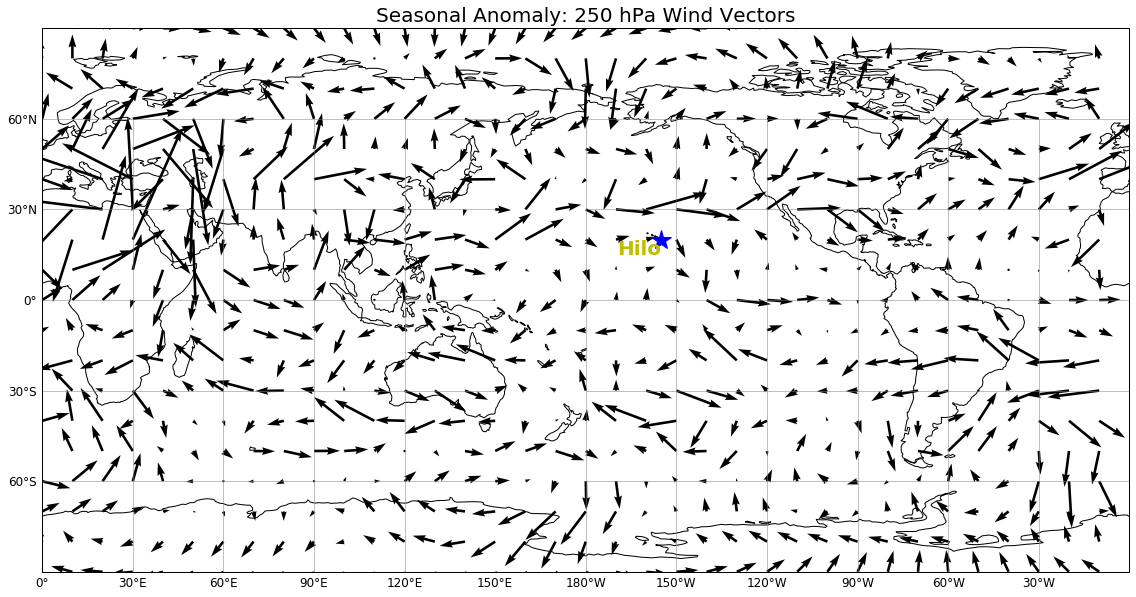

In [28]:
# 250 hPa wind speed and wind vectors 
plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))

ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='y',transform=ccrs.PlateCarree())

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False

ax.coastlines()

# wind vectors
ax.quiver(sa_windu_250_ds_yearcombined_extrem['lon'][::4].values, sa_windu_250_ds_yearcombined_extrem['lat'][::4].values, sa_windu_250_ds_yearcombined_extrem['uwnd'][::4,::4].values, sa_windv_250_ds_yearcombined_extrem['vwnd'][::4,::4].values)

plt.title('Seasonal Anomaly: 250 hPa Wind Vectors', fontsize = 20)
#cb = fig.colorbar(c1, shrink=0.6)
#cb.ax.tick_params(labelsize = 12)
#cb.set_label('Temperature [K]', fontsize = 16)

plt.savefig('/content/drive/My Drive/ATMS_597_Project_3_Group_D/seasonal_anomaly_250hPa.png')



500 hPa

In [0]:
windu_500_ds_yearcombined_extrem = xr.open_dataset('/content/drive/My Drive/ATMS_597_Project_3_Group_D/fields on extreme precip days/windu_500_ds_yearcombined_extrem.nc', engine='netcdf4')
windv_500_ds_yearcombined_extrem = xr.open_dataset('/content/drive/My Drive/ATMS_597_Project_3_Group_D/fields on extreme precip days/windv_500_ds_yearcombined_extrem.nc', engine='netcdf4')
hgt_500_ds_yearcombined_extrem = xr.open_dataset('/content/drive/My Drive/ATMS_597_Project_3_Group_D/fields on extreme precip days/hgt_500_ds_yearcombined_extrem.nc', engine='netcdf4')

In [0]:
sa_windu_500_ds_yearcombined_extrem = windu_500_ds_yearcombined_extrem.mean(dim='time') - windu_500_ltm_OND
sa_windv_500_ds_yearcombined_extrem = windv_500_ds_yearcombined_extrem.mean(dim='time') - windv_500_ltm_OND
sa_hgt_500_ds_yearcombined_extrem = hgt_500_ds_yearcombined_extrem.mean(dim='time') - hgt_500_ltm_OND

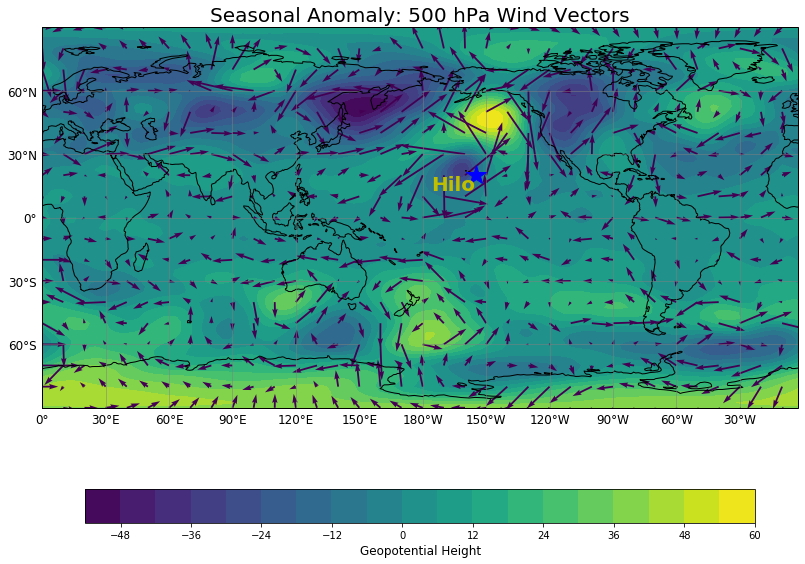

In [85]:
# 500 hPa wind vectors and geopotential height
plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='y',transform=ccrs.PlateCarree())

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False

ax.coastlines()

plt.title('Seasonal Anomaly: 500 hPa Wind Vectors', fontsize = 20)

# geopotential height
c1 = ax.contourf(sa_hgt_500_ds_yearcombined_extrem['lon'], sa_hgt_500_ds_yearcombined_extrem['lat'], sa_hgt_500_ds_yearcombined_extrem['hgt'].values.squeeze(),20, transform=ccrs.PlateCarree())

# wind vectors 
ax.quiver(sa_windu_500_ds_yearcombined_extrem['lon'][::4], sa_windu_500_ds_yearcombined_extrem['lat'][::4], sa_windu_500_ds_yearcombined_extrem['uwnd'][::4,::4].values.squeeze(), sa_windv_500_ds_yearcombined_extrem['vwnd'][::4,::4].values.squeeze(), 20, transform=ccrs.PlateCarree())

cb = fig.colorbar(c1, ax=ax, shrink=0.6, orientation="horizontal")
cb.ax.tick_params(labelsize = 10)
cb.set_label('Geopotential Height', fontsize = 12)

plt.savefig('/content/drive/My Drive/ATMS_597_Project_3_Group_D/seasonal_anomaly_500hPa.png')

850 hPa

In [0]:
temp_850_ds_yearcombined_extrem = xr.open_dataset('/content/drive/My Drive/ATMS_597_Project_3_Group_D/fields on extreme precip days/temp_850_ds_yearcombined_extrem.nc', engine='netcdf4')
shum_850_ds_yearcombined_extrem = xr.open_dataset('/content/drive/My Drive/ATMS_597_Project_3_Group_D/fields on extreme precip days/shum_850_ds_yearcombined_extrem.nc', engine='netcdf4')
windu_850_ds_yearcombined_extrem = xr.open_dataset('/content/drive/My Drive/ATMS_597_Project_3_Group_D/fields on extreme precip days/windu_850_ds_yearcombined_extrem.nc', engine='netcdf4')
windv_850_ds_yearcombined_extrem = xr.open_dataset('/content/drive/My Drive/ATMS_597_Project_3_Group_D/fields on extreme precip days/windv_850_ds_yearcombined_extrem.nc', engine='netcdf4')


In [0]:
sa_temp_850_ds_yearcombined_extrem = temp_850_ds_yearcombined_extrem.mean(dim='time')-273.15 - temp_850_ltm_OND
sa_shum_850_ds_yearcombined_extrem = shum_850_ds_yearcombined_extrem.mean(dim='time') - spec_hum_850_ltm_OND/1000
sa_windu_850_ds_yearcombined_extrem = windu_850_ds_yearcombined_extrem.mean(dim='time') - windu_850_ltm_OND
sa_windv_850_ds_yearcombined_extrem = windv_850_ds_yearcombined_extrem.mean(dim='time') - windv_850_ltm_OND

/usr/local/lib/python3.6/dist-packages/cartopy/mpl/geoaxes.py:1752: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)


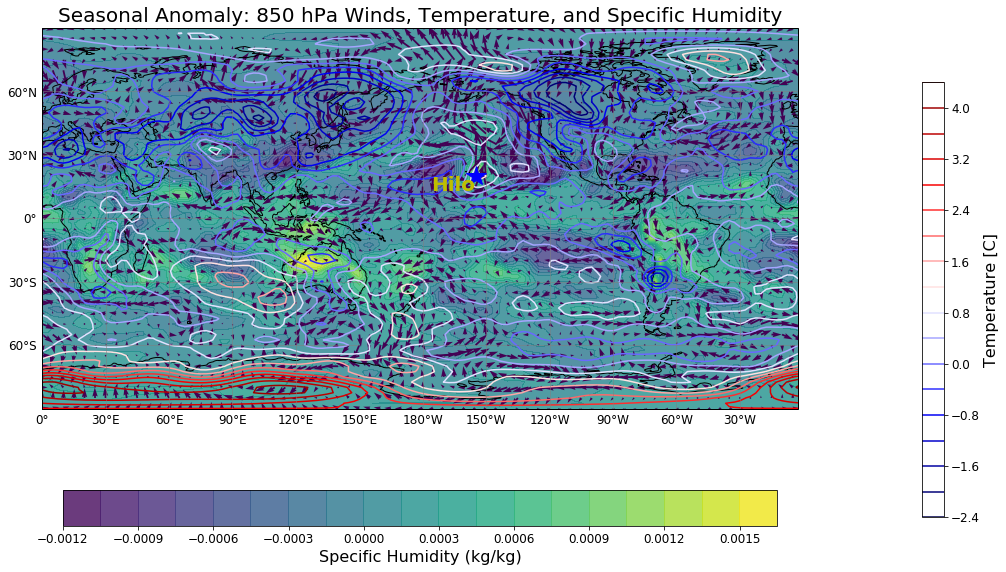

In [105]:
# 850 hPa wind speed and wind vectors 
fig = plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False

ax.coastlines()

plt.title('Seasonal Anomaly: 850 hPa Winds, Temperature, and Specific Humidity', fontsize = 20)

# temperature 
c1 = ax.contour(sa_temp_850_ds_yearcombined_extrem['lon'], sa_temp_850_ds_yearcombined_extrem['lat'], sa_temp_850_ds_yearcombined_extrem['air'].values.squeeze(), 20, transform=ccrs.PlateCarree(), cmap='seismic')
# specific humidity 
c2 = ax.contourf(sa_shum_850_ds_yearcombined_extrem['lon'], sa_shum_850_ds_yearcombined_extrem['lat'], sa_shum_850_ds_yearcombined_extrem['shum'].values.squeeze(), 20, transform=ccrs.PlateCarree(), alpha=0.8)
# wind vectors
c3 = ax.quiver(sa_windu_850_ds_yearcombined_extrem['lon'][::2], sa_windu_850_ds_yearcombined_extrem['lat'][::2], sa_windu_850_ds_yearcombined_extrem['uwnd'][::2,::2].values.squeeze(), sa_windv_850_ds_yearcombined_extrem['vwnd'][::2,::2].values.squeeze(), 20, transform=ccrs.PlateCarree())

cb1 = fig.colorbar(c1, shrink=0.8)
cb1.ax.tick_params(labelsize = 12)
cb1.set_label('Temperature [C]', fontsize = 16)

cb2 = fig.colorbar(c2, shrink=0.8, orientation="horizontal")
cb2.ax.tick_params(labelsize = 12)
cb2.set_label('Specific Humidity (kg/kg)', fontsize = 16)

ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='y',transform=ccrs.PlateCarree())

plt.savefig('/content/drive/My Drive/ATMS_597_Project_3_Group_D/seasonal_anomaly_850hPa_all.png')

Skin Temperature and Surface Winds

In [0]:
sktemp_ds_yearcombined_extrem = xr.open_dataset('/content/drive/My Drive/ATMS_597_Project_3_Group_D/fields on extreme precip days/sktemp_ds_yearcombined_extrem.nc', engine='netcdf4')
surf_windu_ds_yearcombined_extrem = xr.open_dataset('/content/drive/My Drive/ATMS_597_Project_3_Group_D/fields on extreme precip days/surf_windu_ds_yearcombined_extrem.nc', engine='netcdf4')
surf_windv_ds_yearcombined_extrem = xr.open_dataset('/content/drive/My Drive/ATMS_597_Project_3_Group_D/fields on extreme precip days/surf_windv_ds_yearcombined_extrem.nc', engine='netcdf4')

In [0]:
sa_sktemp_ds_yearcombined_extrem = sktemp_ds_yearcombined_extrem.mean(dim='time')-273.15 - skin_temp_ltm_OND
sa_surf_windu_ds_yearcombined_extrem = surf_windu_ds_yearcombined_extrem.mean(dim='time') - surf_wind_u_ltm_OND
sa_surf_windv_ds_yearcombined_extrem = surf_windv_ds_yearcombined_extrem.mean(dim='time') - surf_wind_v_ltm_OND

/usr/local/lib/python3.6/dist-packages/cartopy/mpl/geoaxes.py:1752: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)


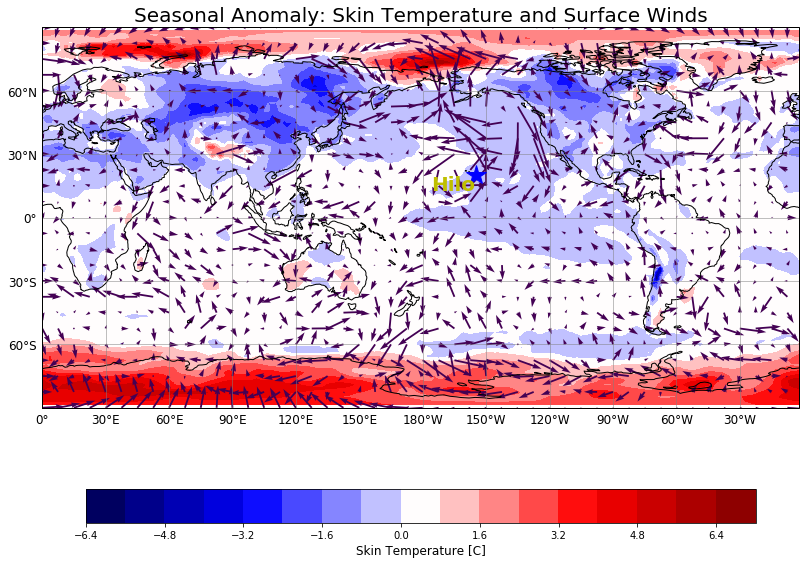

In [80]:
# Skin Temperature and Surface Winds 
plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))

ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='y',transform=ccrs.PlateCarree())

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False

ax.coastlines()

plt.title('Seasonal Anomaly: Skin Temperature and Surface Winds', fontsize = 20)

# skin temperature 
c1 = ax.contourf(sa_sktemp_ds_yearcombined_extrem['lon'], sa_sktemp_ds_yearcombined_extrem['lat'], sa_sktemp_ds_yearcombined_extrem['skt'].values.squeeze(), 20, transform=ccrs.PlateCarree(), cmap='seismic')
# wind vectors
ax.quiver(sa_surf_windu_ds_yearcombined_extrem['lon'][::3], sa_surf_windu_ds_yearcombined_extrem['lat'][::3], sa_surf_windu_ds_yearcombined_extrem['uwnd'][::3,::3].values.squeeze(), sa_surf_windv_ds_yearcombined_extrem['vwnd'][::3,::3].values.squeeze(), 20, transform=ccrs.PlateCarree())

cb = fig.colorbar(c1, ax=ax, shrink=0.6, orientation="horizontal")
cb.ax.tick_params(labelsize = 10)
cb.set_label('Skin Temperature [C]', fontsize = 12)

plt.savefig('/content/drive/My Drive/ATMS_597_Project_3_Group_D/seasonal_anomaly_sktemp_surfwinds.png')

Atmospheric Column Water Vapor

In [0]:
pr_wtr_ds_yearcombined_extrem = xr.open_dataset('/content/drive/My Drive/ATMS_597_Project_3_Group_D/fields on extreme precip days/pr_wtr_ds_yearcombined_extrem.nc', engine='netcdf4')

In [0]:
sa_pr_wtr_ds_yearcombined_extrem = pr_wtr_ds_yearcombined_extrem.mean(dim='time') - atm_col_wv_ltm_OND

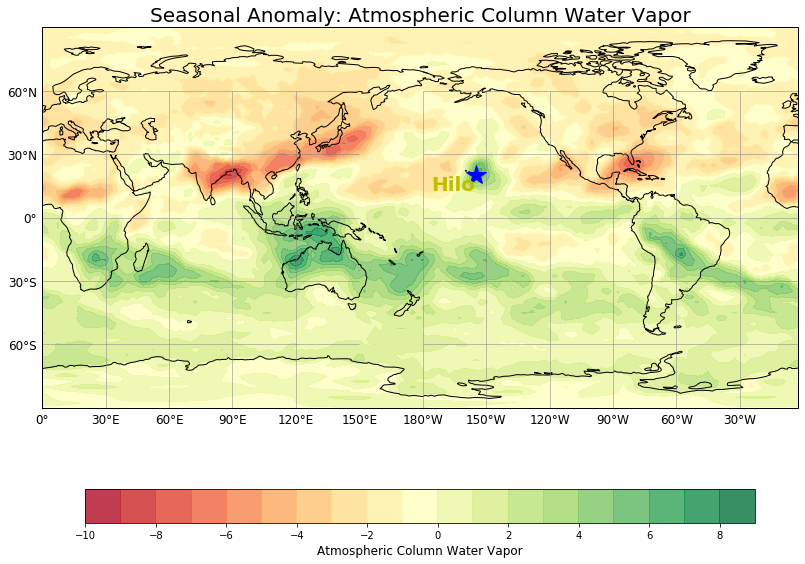

In [70]:
# Atmospheric Column Water Vapor 
plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))

ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='y',transform=ccrs.PlateCarree())

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False

ax.coastlines()

plt.title('Seasonal Anomaly: Atmospheric Column Water Vapor', fontsize = 20)

c1 = ax.contourf(sa_pr_wtr_ds_yearcombined_extrem['lon'], sa_pr_wtr_ds_yearcombined_extrem['lat'], sa_pr_wtr_ds_yearcombined_extrem['pr_wtr'].values.squeeze(), 20, transform=ccrs.PlateCarree(), cmap='RdYlGn', alpha=0.8)

cb = fig.colorbar(c1, ax=ax, shrink=0.6, orientation="horizontal")
cb.ax.tick_params(labelsize = 10)
cb.set_label('Atmospheric Column Water Vapor', fontsize = 12)

plt.savefig('/content/drive/My Drive/ATMS_597_Project_3_Group_D/seasonal_anomaly_pr_wtr.png')

# **Long-Term Mean Maps**


In [0]:
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature

250 hPa

/usr/local/lib/python3.6/dist-packages/cartopy/mpl/geoaxes.py:1752: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)


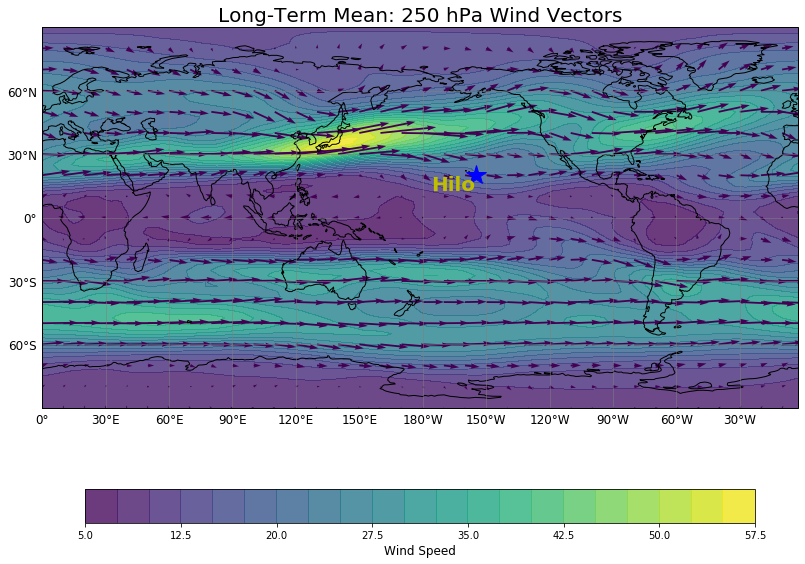

In [76]:
# 250 hPa wind, long term mean 
plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))

ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='y',transform=ccrs.PlateCarree())

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False

ax.coastlines()

plt.title('Long-Term Mean: 250 hPa Wind Vectors', fontsize = 20)

c1 = ax.contourf(windspd_250_ltm_OND['lon'], windspd_250_ltm_OND['lat'], windspd_250_ltm_OND['wspd'].values.squeeze(), 20, transform=ccrs.PlateCarree(), alpha=0.8)
ax.quiver(windu_250_ltm_OND['lon'][::4], windu_250_ltm_OND['lat'][::4], windu_250_ltm_OND['uwnd'][::4,::4].values.squeeze(), windv_250_ltm_OND['vwnd'][::4,::4].values.squeeze(), 20, transform=ccrs.PlateCarree())

cb = fig.colorbar(c1, ax=ax, shrink=0.6, orientation="horizontal")
cb.ax.tick_params(labelsize = 10)
cb.set_label('Wind Speed', fontsize = 12)

plt.savefig('/content/drive/My Drive/ATMS_597_Project_3_Group_D/long_term_250hPa.png')

500 hPa

/usr/local/lib/python3.6/dist-packages/cartopy/mpl/geoaxes.py:1752: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)


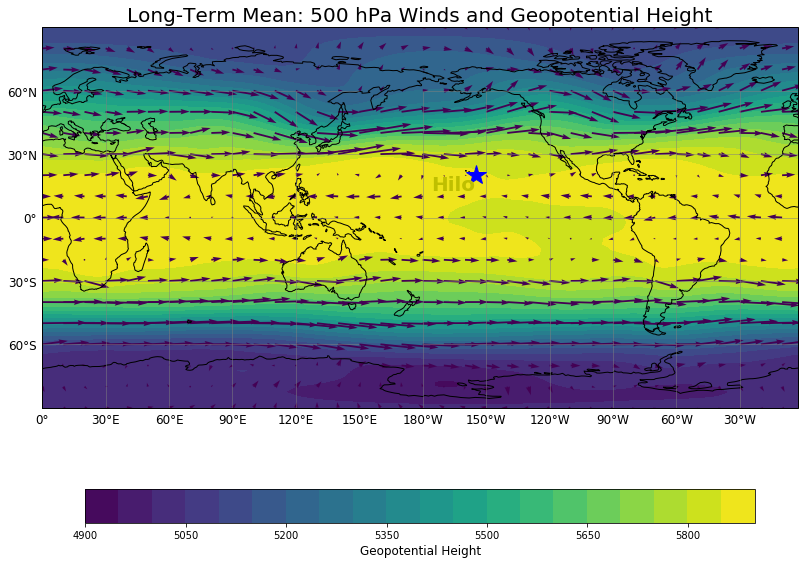

In [109]:
# 500 hPa wind speed and geopotential height, long term mean 
plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))

ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='y',transform=ccrs.PlateCarree())

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False

ax.coastlines()

plt.title('Long-Term Mean: 500 hPa Winds and Geopotential Height', fontsize = 20)

c1 = ax.contourf(hgt_500_ltm_OND['lon'], hgt_500_ltm_OND['lat'], hgt_500_ltm_OND['hgt'].values.squeeze(),20, transform=ccrs.PlateCarree())
ax.quiver(windu_500_ltm_OND['lon'][::4], windu_500_ltm_OND['lat'][::4], windu_500_ltm_OND['uwnd'][::4,::4].values.squeeze(), windv_500_ltm_OND['vwnd'][::4,::4].values.squeeze(), 20, transform=ccrs.PlateCarree())

cb = fig.colorbar(c1, ax=ax, shrink=0.6, orientation="horizontal")
cb.ax.tick_params(labelsize = 10)
cb.set_label('Geopotential Height', fontsize = 12)

plt.savefig('/content/drive/My Drive/ATMS_597_Project_3_Group_D/long_term_500hPa.png')

850 hPa

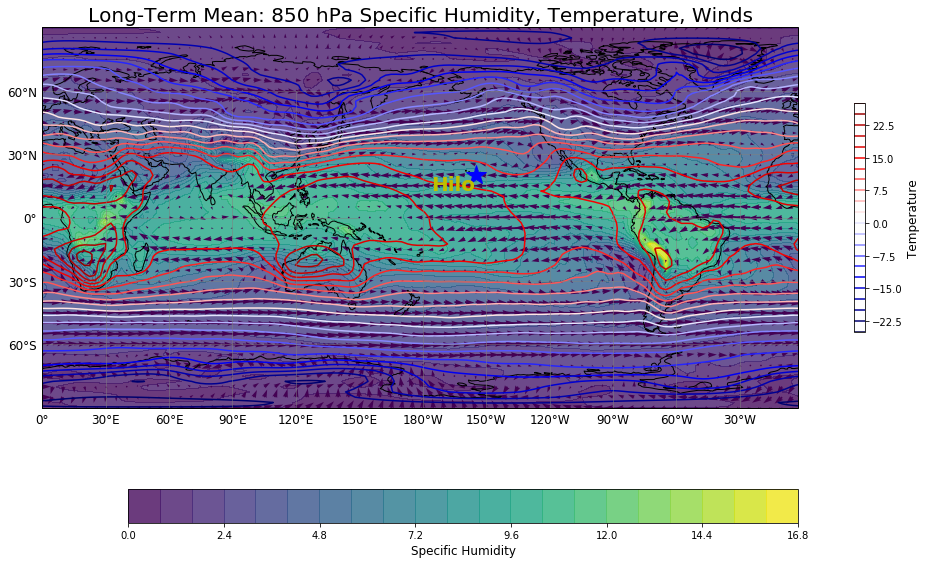

In [108]:
# 850 hPa Specific Humidity, Temperature, Wind Vectors, long term mean 
plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))

ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='y',transform=ccrs.PlateCarree())

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False

ax.coastlines()

plt.title('Long-Term Mean: 850 hPa Specific Humidity, Temperature, Winds', fontsize = 20)

# Specific Humidity 
c1 = ax.contourf(spec_hum_850_ltm_OND['lon'], spec_hum_850_ltm_OND['lat'], spec_hum_850_ltm_OND['shum'].values.squeeze(), 20, transform=ccrs.PlateCarree(), alpha=0.8)
cb1 = fig.colorbar(c1, ax=ax, shrink=0.6, orientation="horizontal")
cb1.ax.tick_params(labelsize = 10)
cb1.set_label('Specific Humidity', fontsize = 12)

# Temperature 
c2 = ax.contour(temp_850_ltm_OND['lon'], temp_850_ltm_OND['lat'], temp_850_ltm_OND['air'].values.squeeze(), 20, transform=ccrs.PlateCarree(), cmap="seismic")
cb2 = fig.colorbar(c2, ax=ax, shrink=0.6)
cb2.ax.tick_params(labelsize = 10)
cb2.set_label('Temperature', fontsize = 12)

# Wind Vectors 
ax.quiver(windu_850_ltm_OND['lon'][::2], windu_850_ltm_OND['lat'][::2], windu_850_ltm_OND['uwnd'][::2,::2].values.squeeze(), windv_850_ltm_OND['vwnd'][::2,::2].values.squeeze(), 20, transform=ccrs.PlateCarree())
plt.savefig('/content/drive/My Drive/ATMS_597_Project_3_Group_D/long_term_850hPa_all.png')


Skin Temperature and Surface Winds

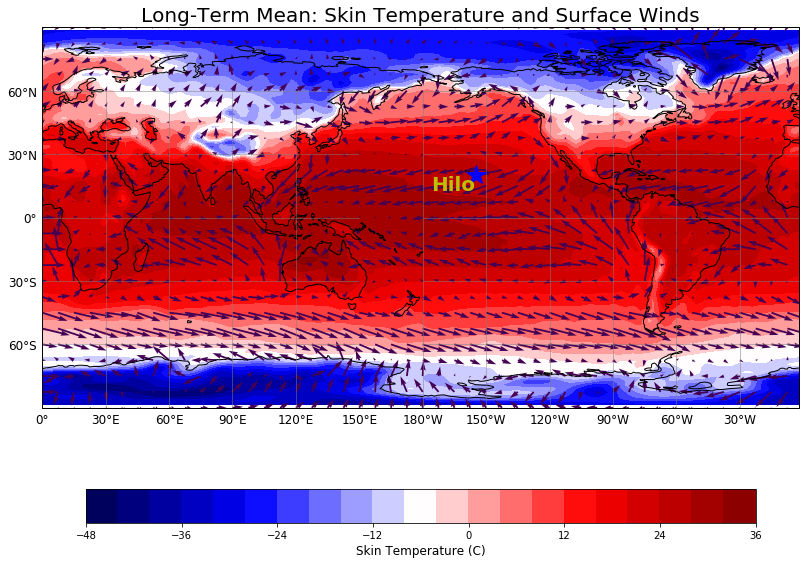

In [113]:
# Skin Temperature and Surface Winds 
plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))

ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='y',transform=ccrs.PlateCarree())

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False

ax.coastlines()

plt.title('Long-Term Mean: Skin Temperature and Surface Winds', fontsize = 20)

# skin temperature 
c1 = ax.contourf(skin_temp_ltm_OND['lon'], skin_temp_ltm_OND['lat'], skin_temp_ltm_OND['skt'].values.squeeze(), 20, transform=ccrs.PlateCarree(), cmap='seismic')
cb = fig.colorbar(c1, ax=ax, shrink=0.6, orientation="horizontal")
cb.ax.tick_params(labelsize = 10)
cb.set_label('Skin Temperature (C)', fontsize = 12)

# wind vectors
ax.quiver(surf_wind_u_ltm_OND['lon'][::3], surf_wind_u_ltm_OND['lat'][::3], surf_wind_u_ltm_OND['uwnd'][::3,::3].values.squeeze(), surf_wind_v_ltm_OND['vwnd'][::3,::3].values.squeeze(), 20, transform=ccrs.PlateCarree())
plt.savefig('/content/drive/My Drive/ATMS_597_Project_3_Group_D/long_term_sktemp_surfwinds.png')

Atmospheric Column Water Vapor

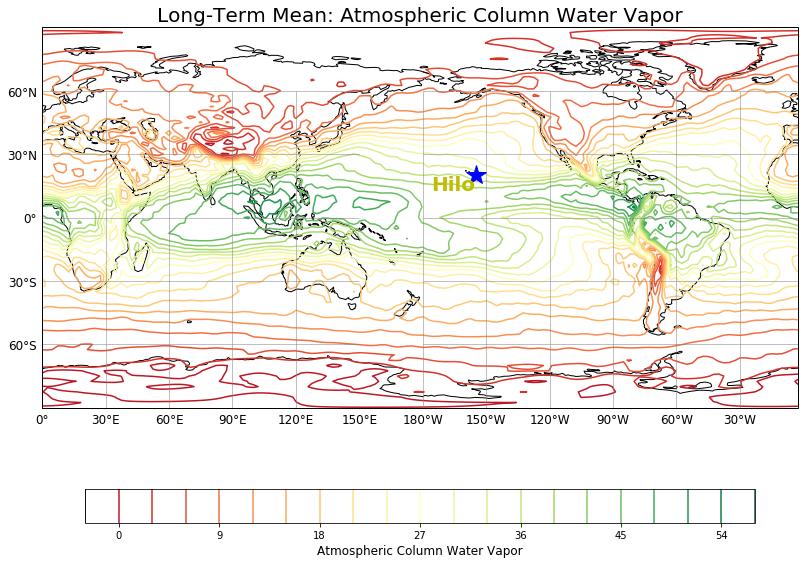

In [115]:
# Atmospheric Column Water Vapor 
plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))

ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='y',transform=ccrs.PlateCarree())

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False

ax.coastlines()

plt.title('Long-Term Mean: Atmospheric Column Water Vapor', fontsize = 20)

c1 = ax.contour(atm_col_wv_ltm_OND['lon'], atm_col_wv_ltm_OND['lat'], atm_col_wv_ltm_OND['pr_wtr'].values.squeeze(), 20, transform=ccrs.PlateCarree(), cmap='RdYlGn')
cb = fig.colorbar(c1, ax=ax, shrink=0.6, orientation="horizontal")
cb.ax.tick_params(labelsize = 10)
cb.set_label('Atmospheric Column Water Vapor', fontsize = 12)

plt.savefig('/content/drive/My Drive/ATMS_597_Project_3_Group_D/long_term_pr_wtr.png')